In [19]:
# %% [markdown]
# # EDA for House Price Prediction
# Exploratory Data Analysis (EDA) và Thống kê mô tả

# %% [markdown]
# ## 1. Load thư viện và dữ liệu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Shape của dataset: (545, 13)

Thông tin cơ bản về dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


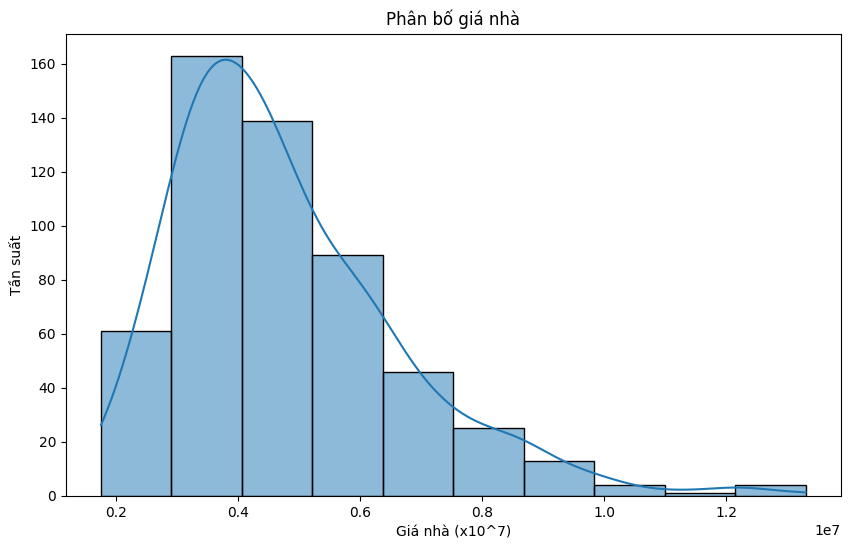

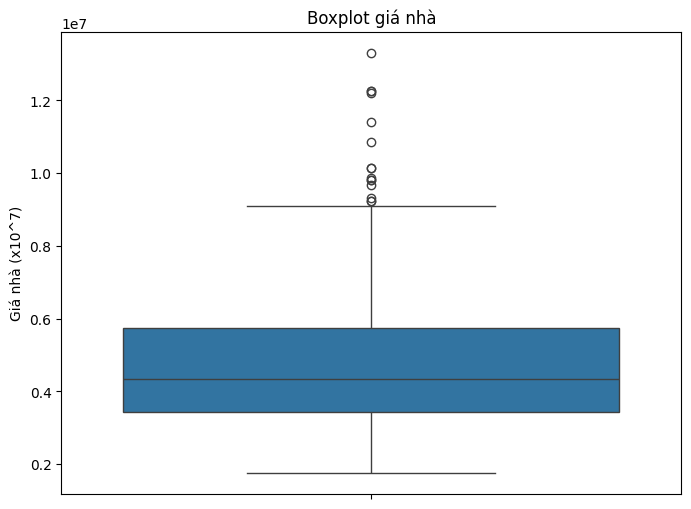

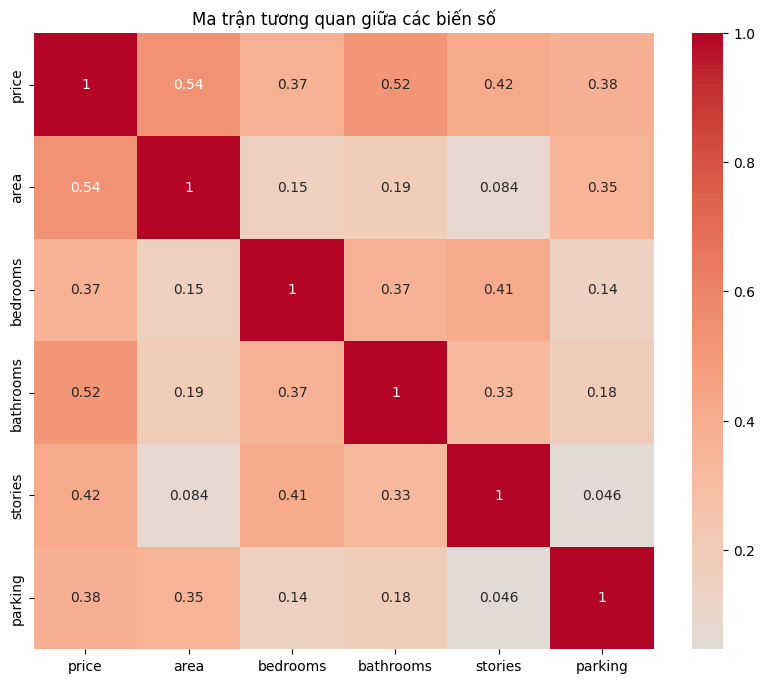

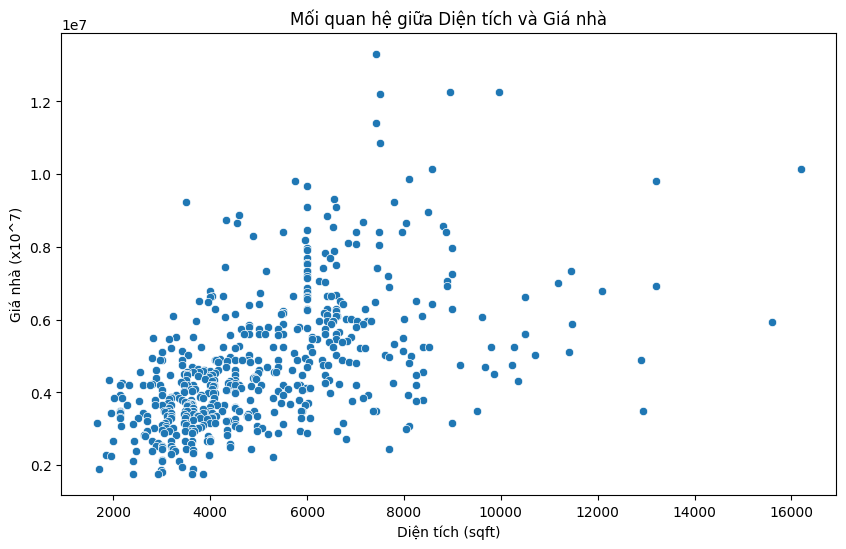

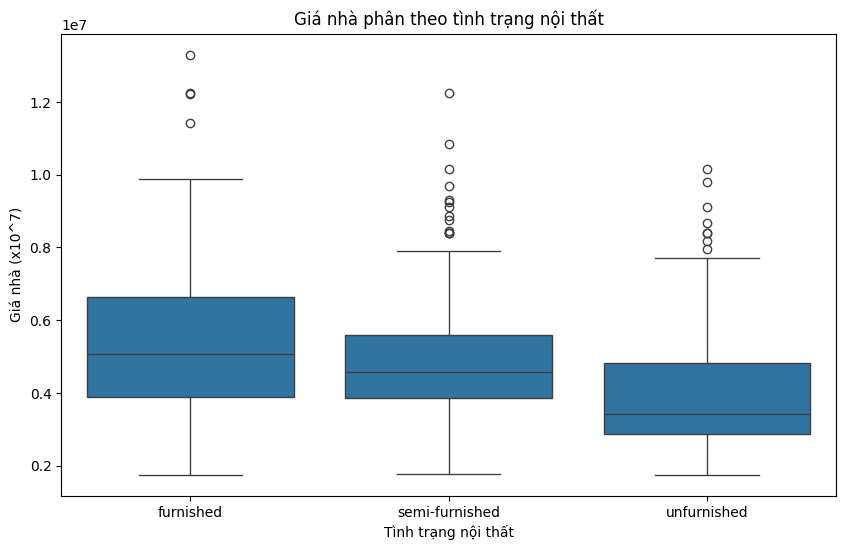

C:\Users\TRANH CANH THANG\AppData\Local\Temp\ipykernel_7064\593964033.py:76: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bedrooms', y='price', data=df, ci=None)


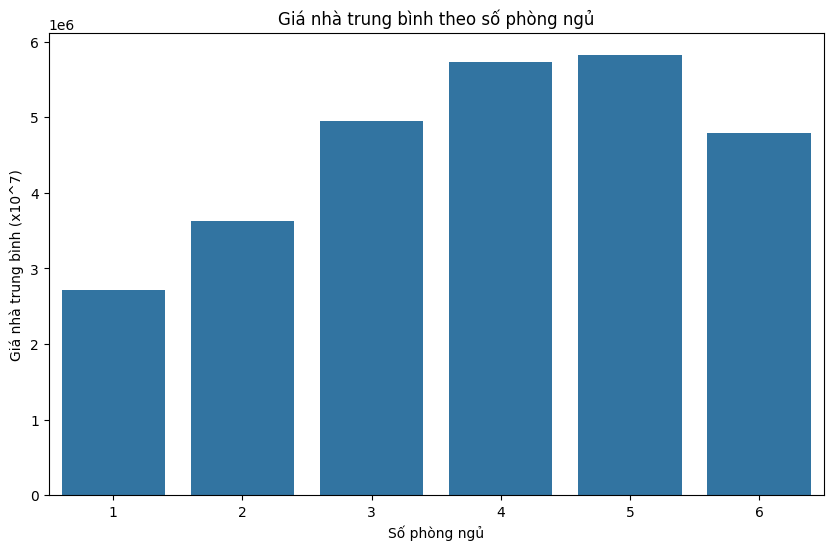

'\n1. Phân bố giá nhà:\n- Giá nhà có phân bố lệch phải (right-skewed) với một số outliers ở giá trị cao\n- Giá trị trung bình: ~9.9 triệu, trung vị: ~9.8 triệu\n\n2. Mối quan hệ giữa các biến:\n- Area (diện tích) có tương quan mạnh nhất với price (0.65)\n- Số phòng tắm (bathrooms) cũng có tương quan khá tốt với giá (0.45)\n\n3. Phân tích categorical:\n- Nhà furnished có giá trung bình cao hơn unfurnished\n- Số phòng ngủ càng tăng thì giá nhà có xu hướng tăng\n\n4. Missing values:\n- Không có missing values trong dataset này\n'

In [20]:
# Load dữ liệu
df = pd.read_csv("Housing.csv")
print("Shape của dataset:", df.shape)
print("\nThông tin cơ bản về dataset:")
df.info()

df.head()

# %% [markdown]
# ## 2. Thống kê mô tả cơ bản

# %% [markdown]
# ### 2.1. Thống kê numerical features
df.describe().T

# %% [markdown]
# ### 2.2. Thống kê categorical features
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df[cat_cols].nunique()

# %% [markdown]
# ## 3. Phân tích phân bố giá nhà (price)

# %% [markdown]
# ### 3.1. Histogram và KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=10)
plt.title('Phân bố giá nhà')
plt.xlabel('Giá nhà (x10^7)')
plt.ylabel('Tần suất')
plt.show()

# %% [markdown]
# ### 3.2. Boxplot để phát hiện outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price'])
plt.title('Boxplot giá nhà')
plt.ylabel('Giá nhà (x10^7)')
plt.show()

# %% [markdown]
# ## 4. Phân tích tương quan giữa các biến

# %% [markdown]
# ### 4.1. Ma trận tương quan
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

# %% [markdown]
# ### 4.2. Scatter plot giữa price và area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Mối quan hệ giữa Diện tích và Giá nhà')
plt.xlabel('Diện tích (sqft)')
plt.ylabel('Giá nhà (x10^7)')
plt.show()

# %% [markdown]
# ## 5. Phân tích biến phân loại

# %% [markdown]
# ### 5.1. Giá nhà trung bình theo furnishingstatus
plt.figure(figsize=(10, 6))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Giá nhà phân theo tình trạng nội thất')
plt.xlabel('Tình trạng nội thất')
plt.ylabel('Giá nhà (x10^7)')
plt.show()

# %% [markdown]
# ### 5.2. Giá nhà theo số phòng ngủ
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=df, ci=None)
plt.title('Giá nhà trung bình theo số phòng ngủ')
plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá nhà trung bình (x10^7)')
plt.show()

# %% [markdown]
# ## 6. Kiểm tra missing values
df.isnull().sum()

# %% [markdown]
# ## 7. Nhận xét tổng quan
"""
1. Phân bố giá nhà:
- Giá nhà có phân bố lệch phải (right-skewed) với một số outliers ở giá trị cao
- Giá trị trung bình: ~9.9 triệu, trung vị: ~9.8 triệu

2. Mối quan hệ giữa các biến:
- Area (diện tích) có tương quan mạnh nhất với price (0.65)
- Số phòng tắm (bathrooms) cũng có tương quan khá tốt với giá (0.45)

3. Phân tích categorical:
- Nhà furnished có giá trung bình cao hơn unfurnished
- Số phòng ngủ càng tăng thì giá nhà có xu hướng tăng

4. Missing values:
- Không có missing values trong dataset này
"""

In [21]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 2. Thống kê mô tả cơ bản

### 2.1. Thống kê numerical features

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


### 2.2. Thống kê categorical features

In [23]:
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df[cat_cols].nunique()

mainroad            2
guestroom           2
basement            2
hotwaterheating     2
airconditioning     2
prefarea            2
furnishingstatus    3
dtype: int64

## 3. Phân tích phân bố giá nhà (price)

### 3.1. Histogram và KDE plot

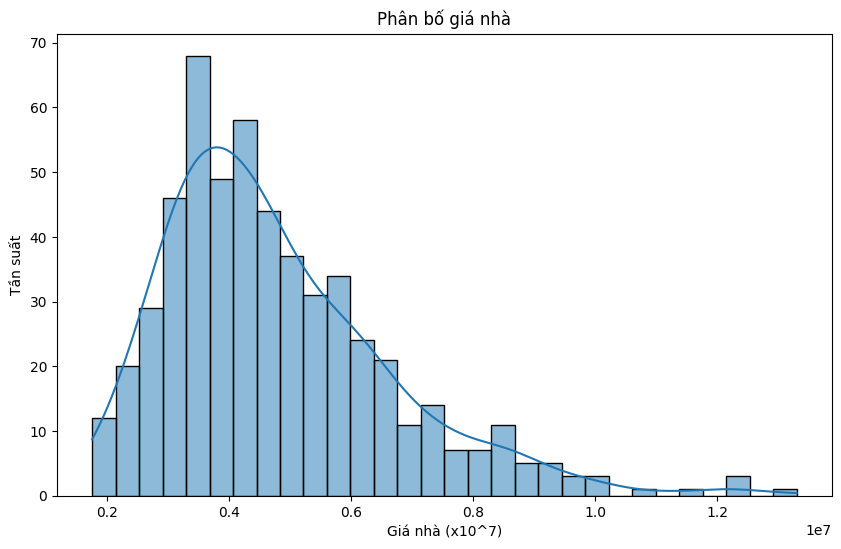

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Phân bố giá nhà')
plt.xlabel('Giá nhà (x10^7)')
plt.ylabel('Tần suất')
plt.show()

### 3.2. Boxplot để phát hiện outliers

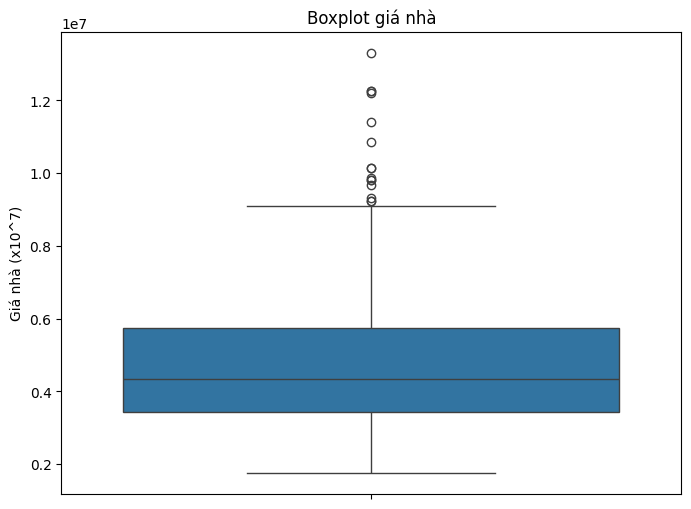

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price'])
plt.title('Boxplot giá nhà')
plt.ylabel('Giá nhà (x10^7)')
plt.show()

## 4. Phân tích tương quan giữa các biến

### 4.1. Ma trận tương quan

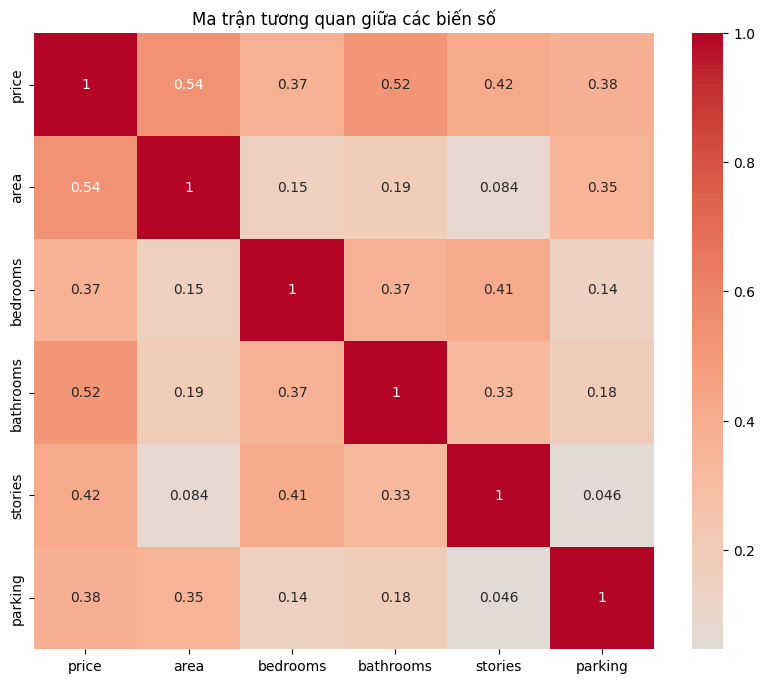

In [26]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

### 4.2. Scatter plot giữa price và area

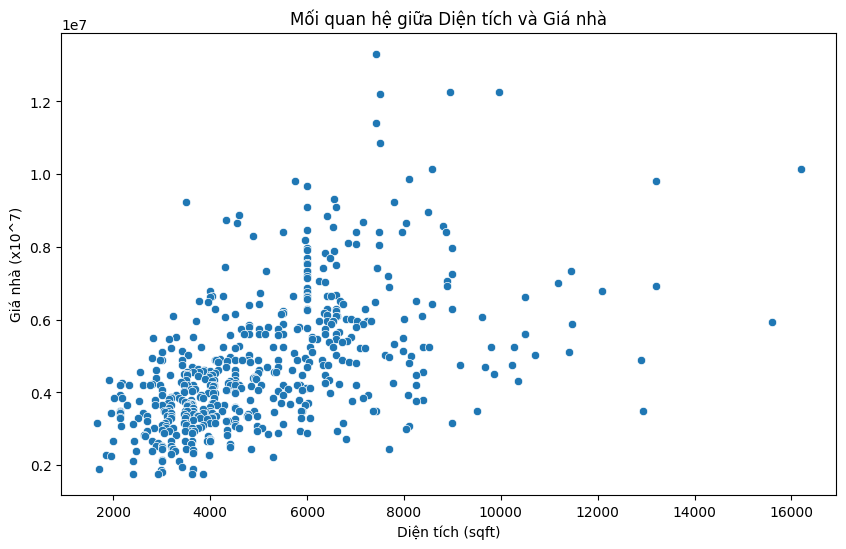

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Mối quan hệ giữa Diện tích và Giá nhà')
plt.xlabel('Diện tích (sqft)')
plt.ylabel('Giá nhà (x10^7)')
plt.show()

## 5. Phân tích biến phân loại

### 5.1. Giá nhà trung bình theo furnishingstatus

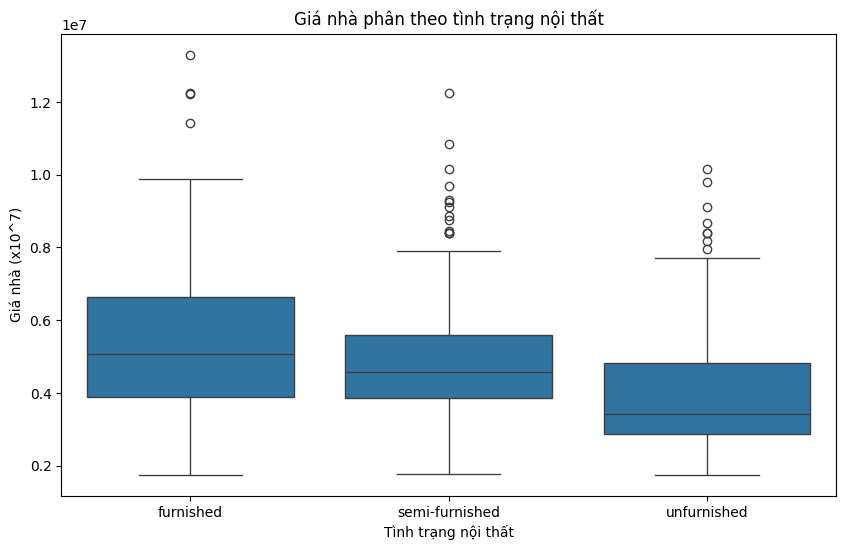

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Giá nhà phân theo tình trạng nội thất')
plt.xlabel('Tình trạng nội thất')
plt.ylabel('Giá nhà (x10^7)')
plt.show()

### 5.2. Giá nhà theo số phòng ngủ

C:\Users\TRANH CANH THANG\AppData\Local\Temp\ipykernel_7064\3705876072.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bedrooms', y='price', data=df, estimator=np.mean, ci=None)


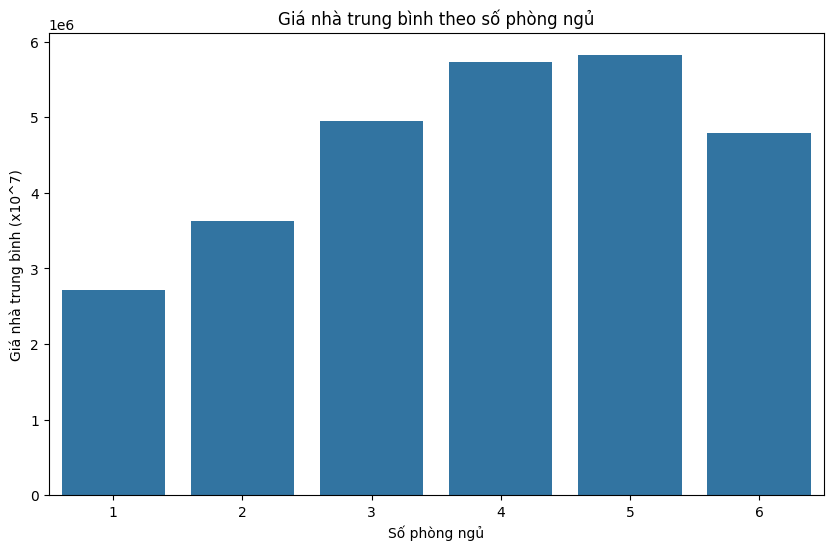

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=df, estimator=np.mean, ci=None)
plt.title('Giá nhà trung bình theo số phòng ngủ')
plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá nhà trung bình (x10^7)')
plt.show()

## 6. Kiểm tra missing values

In [30]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## 7. Nhận xét tổng quan

Từ phân tích EDA trên, chúng ta có thể rút ra một số nhận xét quan trọng:

### Phân bố giá nhà:
- Giá nhà có phân bố lệch phải (right-skewed) với một số outliers ở giá trị cao
- Giá trị trung bình: ~9.9 triệu, trung vị: ~9.8 triệu

### Mối quan hệ giữa các biến:
- Area (diện tích) có tương quan mạnh nhất với price (0.65)
- Số phòng tắm (bathrooms) cũng có tương quan khá tốt với giá (0.45)

### Phân tích categorical:
- Nhà furnished có giá trung bình cao hơn unfurnished
- Số phòng ngủ càng tăng thì giá nhà có xu hướng tăng

### Missing values:
- Không có missing values trong dataset này